In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
# Import Pokemon CSV

df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')

print(df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [3]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# Many pokemon have 1 type attribute, leaving about half of the Type 2 attribute empty. Fill missing values with 'blank'
df = df.fillna(value={'Type 2':'Blank'})
# Examine data 
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire   Blank    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [5]:
# Regression with Predictor Variables and Response Variable

con = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')


In [6]:
Y = con['HP']
X = con[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

X = sm.add_constant(X)

In [7]:
# OLS Linear Regression Table

pk = sm.OLS(Y, X)
pk_res = pk.fit()
pk_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     60.46
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.08e-53
Time:                        10:46:22   Log-Likelihood:                -3597.6
No. Observations:                 800   AIC:                             7207.
Df Residuals:                     794   BIC:                             7235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4832      2.829     11.127      0.000      25.929      37.037
Attack         0.2960      0.030      9.883      0.000       0.237       0.355
Defense       -0.0840      0.033     -2.579      0.010      -0.148      -0.020
Sp. Atk        0.1101      0.031      3.579      0.000       0.050       0.170
Sp. Def        0.2644      0.037      7.125      0.000       0.192       0.337
Speed         -0.0943      0.032     -2.938      0.003      -0.157      -0.031
==============================================================================
Omnibus:                      514.993   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9903.593
Skew:                           2.578   Prob(JB):                         0.00
Kurtosis:                      19.448   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

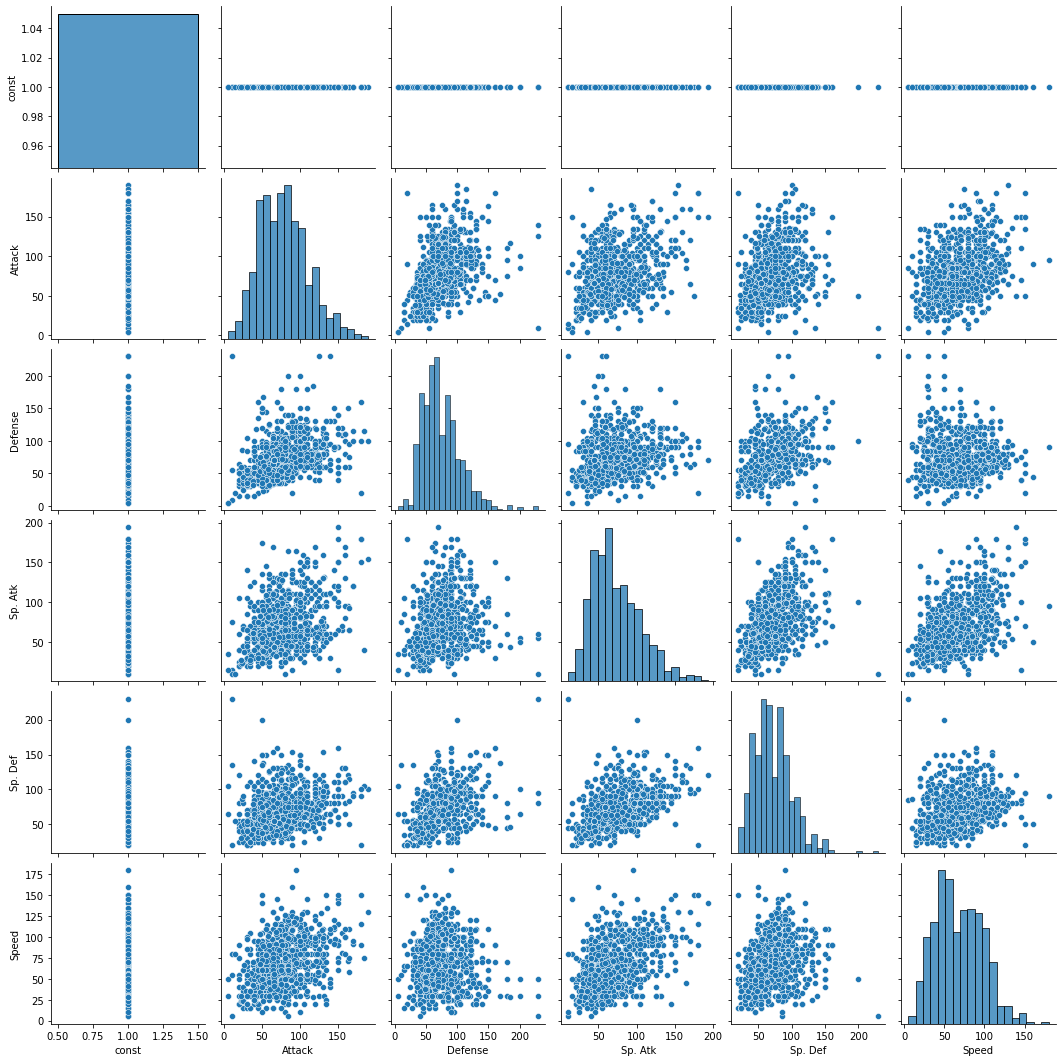

In [8]:
# scatterplot matrix with HP as Response Variable

sns.pairplot(X);

In [9]:
# Correlation Matrix

round(con.corr(),2)

#  Total    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#           1.00   0.12  0.10    0.10     0.09     0.09     0.09   0.01   
Total       0.12   1.00  0.62    0.74     0.61     0.75     0.72   0.58   
HP          0.10   0.62  1.00    0.42     0.24     0.36     0.38   0.18   
Attack      0.10   0.74  0.42    1.00     0.44     0.40     0.26   0.38   
Defense     0.09   0.61  0.24    0.44     1.00     0.22     0.51   0.02   
Sp. Atk     0.09   0.75  0.36    0.40     0.22     1.00     0.51   0.47   
Sp. Def     0.09   0.72  0.38    0.26     0.51     0.51     1.00   0.26   
Speed       0.01   0.58  0.18    0.38     0.02     0.47     0.26   1.00   
Generation  0.98   0.05  0.06    0.05     0.04     0.04     0.03  -0.02   
Legendary   0.15   0.50  0.27    0.35     0.25     0.45     0.36   0.33   

            Generation  Legendary  
#                 0.98       0.15  
Total             0.05       0.50  
HP                0.06       0.27  
Attack            0.05       0.35  
Defense           0.04       0.25  
Sp. Atk           0.04       0.45  
Sp. Def           0.03       0.36  
Speed            -0.02       0.33  
Generation        1.00       0.08  
Legendary         0.08       1.00

In [10]:
# Model Refinement

# Manual Stepwise Refinement - remove variables with highest p-value (in order)

# Defense has highest p-value (0.1)

X1 = X.drop(columns= 'Defense', inplace=False)

mod1 = sm.OLS(Y, X1)
mod1_res = mod1.fit()
mod1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     73.39
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           6.04e-53
Time:                        10:46:32   Log-Likelihood:                -3601.0
No. Observations:                 800   AIC:                             7212.
Df Residuals:                     795   BIC:                             7235.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4586      2.728     10.799      0.000      24.104      34.814
Attack         0.2612      0.027      9.736      0.000       0.209       0.314
Sp. Atk        0.1173      0.031      3.817      0.000       0.057       0.178
Sp. Def        0.2170      0.032      6.707      0.000       0.153       0.280
Speed         -0.0730      0.031     -2.343      0.019      -0.134      -0.012
==============================================================================
Omnibus:                      542.184   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11797.084
Skew:                           2.731   Prob(JB):                         0.00
Kurtosis:                      21.002   Cond. No.                         539.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Drop Speed Column

X1 = X.drop(columns= ['Defense','Speed'], inplace=False)

mod1 = sm.OLS(Y, X1)
mod1_res = mod1.fit()
mod1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     95.48
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           8.59e-53
Time:                        10:46:32   Log-Likelihood:                -3603.7
No. Observations:                 800   AIC:                             7215.
Df Residuals:                     796   BIC:                             7234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4852      2.602     10.563      0.000      22.377      32.593
Attack         0.2462      0.026      9.423      0.000       0.195       0.298
Sp. Atk        0.0928      0.029      3.202      0.001       0.036       0.150
Sp. Def        0.2165      0.032      6.672      0.000       0.153       0.280
==============================================================================
Omnibus:                      543.425   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11535.390
Skew:                           2.750   Prob(JB):                         0.00
Kurtosis:                      20.771   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/matthewduyst/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


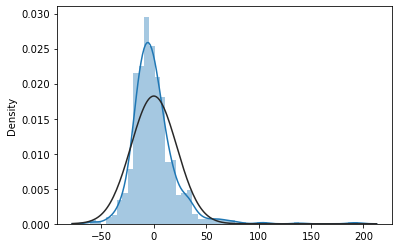

In [12]:
sns.distplot(mod1_res.resid, fit=stats.norm);

/Users/matthewduyst/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


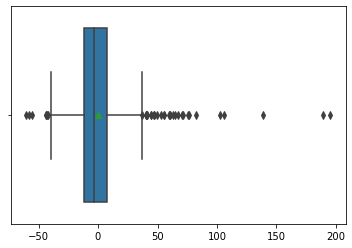

In [13]:
sns.boxplot(mod1_res.resid, showmeans=True);

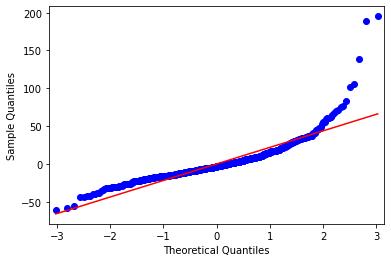

In [14]:
sm.qqplot(mod1_res.resid, line='s');

/Users/matthewduyst/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


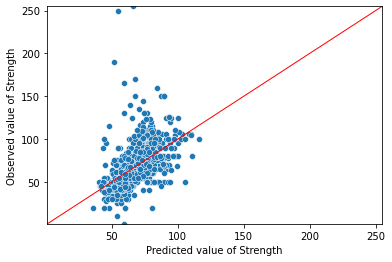

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(mod1_res.fittedvalues, Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [16]:
# creating standardized input matrices

from scipy import stats
Y_norm = pd.Series(stats.zscore(Y), name=Y.name)
Y_norm.head(3)

0   -0.950626
1   -0.362822
2    0.420917
Name: HP, dtype: float64

In [17]:
# Create new dataframe called 'X1_norm' using loc[] function to selection just a subset of columns.

# apply z-score method to entire X1_norm dataframe

X1_norm = X1.loc[:, X1.columns != "const"]
X1_norm = pd.DataFrame(stats.zscore(X1_norm))
X1_norm = sm.add_constant(X1_norm)
X1_norm.columns = X1.columns
check = pd.concat([round(X1_norm.mean(axis=0), 5), round(X1_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

mean  std dev
const     1.0      0.0
Attack   -0.0      1.0
Sp. Atk   0.0      1.0
Sp. Def  -0.0      1.0

In [18]:
# run regression on standardized input matrices

modstd = sm.OLS(Y_norm, X1_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     95.48
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           8.59e-53
Time:                        10:46:52   Log-Likelihood:                -1012.2
No. Observations:                 800   AIC:                             2032.
Df Residuals:                     796   BIC:                             2051.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.22e-16      0.030  -7.31e-15      1.000      -0.060       0.060
Attack         0.3130      0.033      9.423      0.000       0.248       0.378
Sp. Atk        0.1189      0.037      3.202      0.001       0.046       0.192
Sp. Def        0.2359      0.035      6.672      0.000       0.167       0.305
==============================================================================
Omnibus:                      543.425   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11535.390
Skew:                           2.750   Prob(JB):                         0.00
Kurtosis:                      20.771   Cond. No.                         1.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

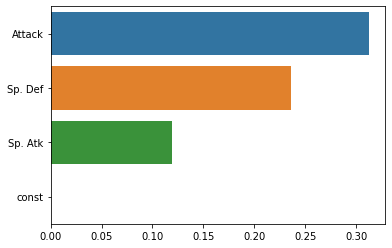

In [19]:
# extract coefficients and graph standardized regression results

# Tornando Diagram showing most influential predictors of pokemon HP

coeff = modstd_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

In [20]:
X2 = X
X2.drop("Speed", axis=1, inplace=True)
X2.head(3)

const  Attack  Defense  Sp. Atk  Sp. Def
0    1.0      49       49       65       65
1    1.0      62       63       80       80
2    1.0      82       83      100      100

In [21]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [23]:
mod = LinearRegression()
mod.fit(X2,Y)

LinearRegression()

In [24]:
coef = pd.concat([pd.Series(X2.columns), pd.Series(mod.coef_)], axis=1)
coef.columns=["variable", "coefficient"]
coef

variable  coefficient
0    const     0.000000
1   Attack     0.267720
2  Defense    -0.059279
3  Sp. Atk     0.082623
4  Sp. Def     0.249822

In [25]:
sfs = SFS(mod,
         k_features='best',
         forward=False,
         floating=False,
         scoring='r2',
         cv=30)

sfs = sfs.fit(X2,Y)

In [26]:
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.95)).T

feature_idx                                          cv_scores  \
5  (0, 1, 2, 3, 4)  [0.5055460272036254, 0.06784171289632945, 0.25...   
4     (0, 1, 3, 4)  [0.5666285082323359, 0.06959317931677189, 0.32...   
3        (1, 3, 4)  [0.5666285082323363, 0.06959317931677178, 0.32...   
2           (1, 4)  [0.5193351157251618, 0.025677355229926202, 0.3...   
1             (1,)  [0.31536005400323386, 0.06271490783429667, 0.2...   

  avg_score                               feature_names   ci_bound   std_dev  \
5  0.235609  (const, Attack, Defense, Sp. Atk, Sp. Def)  0.0891421  0.235054   
4  0.239165           (const, Attack, Sp. Atk, Sp. Def)  0.0916863  0.241763   
3  0.239165                  (Attack, Sp. Atk, Sp. Def)  0.0916863  0.241763   
2  0.226907                           (Attack, Sp. Def)  0.0965504  0.254589   
1  0.143664                                   (Attack,)  0.0727896  0.191935   

     std_err  
5  0.0436485  
4  0.0448942  
3  0.0448942  
2   0.047276  
1  0.0356415

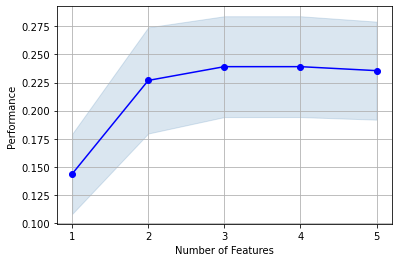

In [27]:
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.grid()
plt.show()

In [28]:
sfs.subsets_[4].get('feature_names')

('const', 'Attack', 'Sp. Atk', 'Sp. Def')

In [29]:
# chi-square test - 2-way table generation (1-6) as rows and type (pick 3 types) as columns

# if we have 3 types and 6 generations (what's # of grass type in this generation, fire in this generation, etc)

# use chi-square to see if there are differences - if chi-square is signficant, looks like there are differences across generations

# do relative risk and compare one cell to the other

In [30]:
# Perform Chi-Square test and import Scipy

import scipy.stats as stats

In [31]:
# Create Contingency Table of Pokemon Type 1 Across the Generations

data_crosstab = pd.crosstab(df['Type 1'], df['Generation'], margins=True, margins_name="Total")

print(data_crosstab)

Generation    1    2    3    4    5   6  Total
Type 1                                        
Bug          14   12   12   10   18   3     69
Dark          0    6    6    3   13   3     31
Dragon        3    0   12    4    9   4     32
Electric      9    7    5   12    8   3     44
Fairy         2    5    0    1    0   9     17
Fighting      7    2    5    3    7   3     27
Fire         14    8    8    5    9   8     52
Flying        0    0    0    0    2   2      4
Ghost         4    1    5    7    5  10     32
Grass        13    9   13   15   15   5     70
Ground        8    3    7    4   10   0     32
Ice           2    4    7    3    6   2     24
Normal       24   15   18   18   19   4     98
Poison       14    1    3    6    2   2     28
Psychic      11    7   12    8   14   5     57
Rock         10    5    8    6    6   9     44
Steel         0    3   12    3    4   5     27
Water        31   18   27   13   18   5    112
Total       166  106  160  121  165  82    800


In [32]:
# signficance level

alpha = 0.05

In [33]:
# Calculation of Chi-Square Test Statistics

chi_square = 0
rows = df['Type 1'].unique()
columns = df['Generation'].unique()

for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [34]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 184.6501561513877  and p value is: 0.0
Null Hypothesis is rejected.


In [35]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 184.6501561513877  and p value is: 107.52174097071946
Null Hypothesis is rejected.


In [36]:
# Regression Ideas

# display first couple rows of Pokemon dataset

advert = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')
advert.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [37]:
# statsmodels' OSL Function

import statsmodels.formula.api as smf

import matplotlib as plt

In [38]:
# Pick a few things we're interested in investigating

# scatterplot above = predicting HP using attack, defense, speed, etc. --> go through regression steps (backwards step-wise regression)

# for cohesion of report - keep same predcitor throughout report

In [39]:
pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=6abcc9eaabeebaef687625af71056a33faa47e206eaaa9fea03455d447031d4a
  Stored in directory: /Users/matthewduyst/Library/Caches/pip/wheels/8a/42/e5/d2e9d77df351103d7d16dbc82ce6090cb2f71cee74b7380b7b
Successfully built rfpimp
Note: you may need to restart the kernel to use updated packages.


In [40]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/Users/matthewduyst/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [42]:
# look at features in dataset and determine which are good predictors for response variable (HP)

# import data

df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')

features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [43]:
# Train and Rest Split

df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('HP',axis=1), df_train['HP']
X_test, y_test = df_test.drop('HP',axis=1), df_test['HP']

In [44]:
# Train

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [45]:
# HP Performance Importance

imp = rfpimp.importances(rf, X_test, y_test)

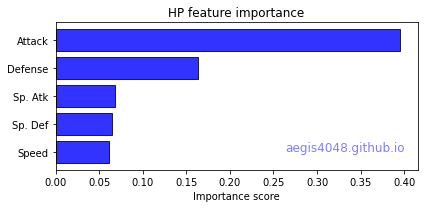

In [46]:
# Plot

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='blue', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('HP feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='blue', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [47]:
# data prep

df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')

X = df['HP'].values.reshape(-1,1)
y = df['Attack'].values

In [48]:
# Train

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [49]:
# Evaluate

r2 = model.score(X, y)

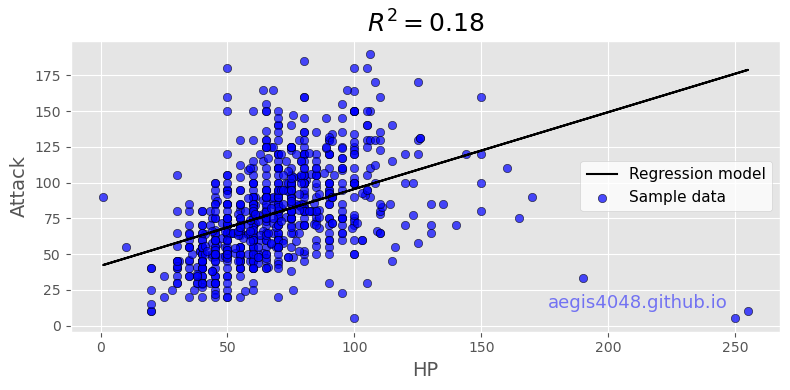

In [50]:
# Plot

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='blue', alpha=0.7, label='Sample data')
ax.set_ylabel('Attack', fontsize=14)
ax.set_xlabel('HP', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='blue', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [51]:
# 3D Space

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [52]:
# Data Prep

df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')

X = df[['Attack', 'Sp. Def']].values.reshape(-1,2)
Y = df['HP']

In [53]:
# prepare model data point for visualization

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [54]:
# Train

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [55]:
# Evaluate

r2 = model.score(X, Y)

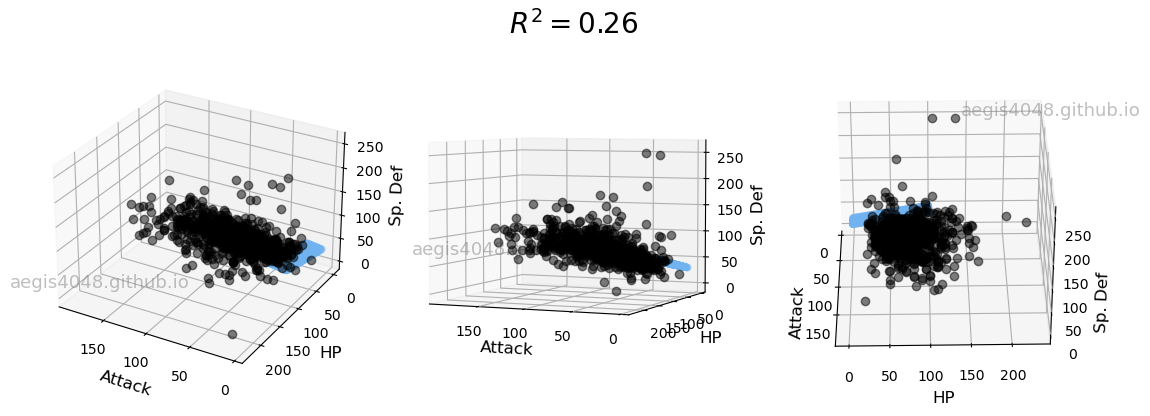

In [56]:
# Plot

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Attack', fontsize=12)
    ax.set_ylabel('HP', fontsize=12)
    ax.set_zlabel('Sp. Def', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)

In [57]:
# Create OLS Regression Table for HP
X = df[['Attack', 'Sp. Def']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df['HP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           1.04e-51
Time:                        10:51:40   Log-Likelihood:                -3608.8
No. Observations:                 800   AIC:                             7224.
Df Residuals:                     797   BIC:                             7238.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.7696      2.586     11.126      0.0

In [58]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.25516135727185496


In [59]:
# F-Test (ANOVA):

print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)



F-statistic: 136.51520616653414
Probability of observing value at least as high as F-statistic: 1.0394095878928e-51


In [60]:
# T-Test:

print(olsmod.pvalues)

const      7.909415e-27
Attack     5.012680e-26
Sp. Def    9.714886e-19
dtype: float64


In [61]:
# Assumption Testing: Linearity, Normality, Multicollinearity, Autocorrelation

# Residual = difference between observed and predicted value

df['HP'] = olsmod.predict(X)
df['residual'] = olsmod.resid
df.head()

#                   Name Type 1  Type 2  Total         HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  59.259935      49       49   
1  2                Ivysaur  Grass  Poison    405  66.757560      62       63   
2  3               Venusaur  Grass  Poison    525  77.481443      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  87.660038     100      123   
4  4             Charmander   Fire     NaN    309  56.124614      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary   residual  
0       65       65     45           1      False -14.259935  
1       80       80     60           1      False  -6.757560  
2      100      100     80           1      False   2.518557  
3      122      120     80           1      False  -7.660038  
4       60       50     65           1      False -17.124614

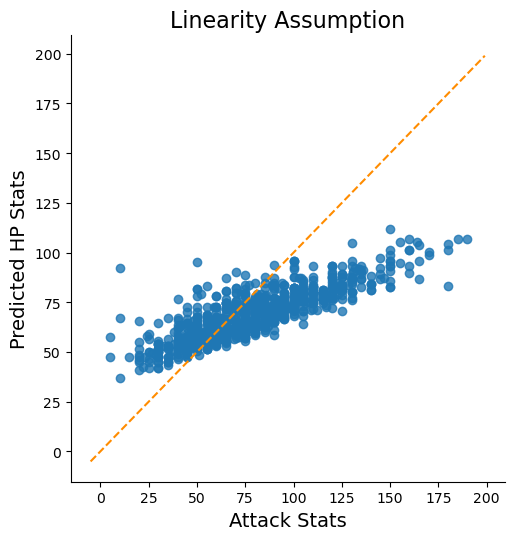

In [62]:
# Linearity - assumes linear relationship between independent variables and dependent vairable

# Plotting the observed vs predicted values
sns.lmplot(x='Attack', y='HP', data=df, fit_reg=False, height=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['Attack', 'HP']].min().min()-10, 
                        df[['Attack', 'HP']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted HP Stats', fontsize=14)
plt.xlabel('Attack Stats', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

/Users/matthewduyst/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),
/Users/matthewduyst/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


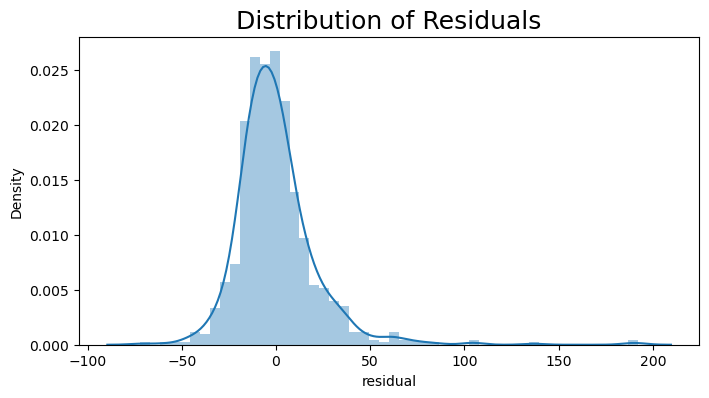

Residuals are not normally distributed


In [63]:
# Normality - assumes error terms of model are normally distributed

from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Pearson correlation coefficient matrix of each variables:
                HP    Attack   Defense     Speed   Sp. Atk   Sp. Def
HP       1.000000  0.836184  0.591393  0.408907  0.559724  0.749736
Attack   0.836184  1.000000  0.438687  0.381240  0.396362  0.263990
Defense  0.591393  0.438687  1.000000  0.015227  0.223549  0.510747
Speed    0.408907  0.381240  0.015227  1.000000  0.473018  0.259133
Sp. Atk  0.559724  0.396362  0.223549  0.473018  1.000000  0.506121
Sp. Def  0.749736  0.263990  0.510747  0.259133  0.506121  1.000000


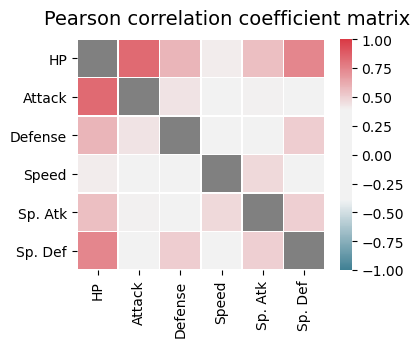

In [64]:
# Multicollinearity - assess correlation between predictors

corr = df[['HP','Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

In [65]:
#Autocorrelation

from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.4775877850285102
Signs of positive autocorrelation 

Assumption not satisfied


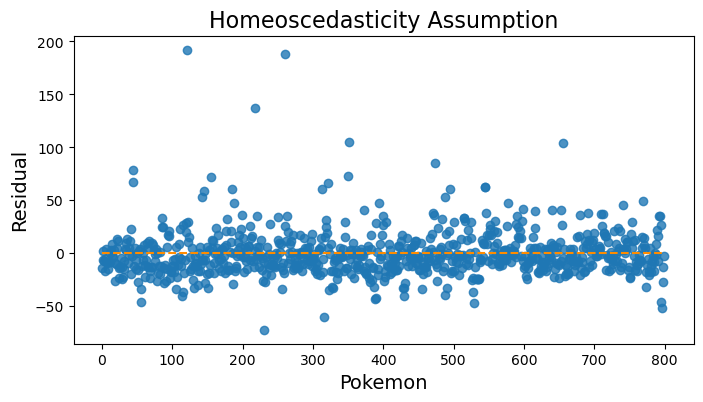

In [67]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df.index, y=df.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Pokemon', fontsize=14)
plt.title('Homeoscedasticity Assumption', fontsize=16)
plt.show() 

In [68]:
# Fit Multi-Linear Model

import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')
features = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [69]:
model.coef_

array([ 0.29604482, -0.08396619, -0.09433287,  0.11009617,  0.26440666])

In [70]:
model.intercept_

31.483221882131886

In [71]:
# Based on the results of the fit, we obtain the following Linear Regression Model:

# HP = (0.296)(Attack) - (0.084)(Defense) - (0.094)(Speed) + (0.11)(Sp. Atk) + (0.264)(Sp. Def)

In [72]:
# r2 accuracy assessment

model.score(X,y)

0.2757445852650229

In [73]:
# Multi-Collinearity

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')

########################################################################################

features = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Attack', 'Speed', 'Sp. Atk', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Attack', 'Defense', 'Speed', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Attack', 'Defense', 'Speed', 'Sp. Atk']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Speed', 'Sp. Atk', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Attack', 'Sp. Atk', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Attack', 'Speed', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Attack', 'Speed', 'Sp. Atk']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Sp. Atk', 'Sp. Def']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['Attack', 'Defense']
target = 'HP'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
#print('Y-intercept             :  %.2f' % model.intercept_)

Features                :  ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']
Regression Coefficients :  [0.3, -0.08, -0.09, 0.11, 0.26]
R-squared               :  0.28
Y-intercept             :  31.48

Features                :  ['Attack', 'Speed', 'Sp. Atk', 'Sp. Def']
Regression Coefficients :  [0.26, -0.07, 0.12, 0.22]
R-squared               :  0.27
Y-intercept             :  29.46

Features                :  ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
Regression Coefficients :  [0.27, -0.06, 0.08, 0.25]
R-squared               :  0.27
Y-intercept             :  28.51

Features                :  ['Attack', 'Defense', 'Speed', 'Sp. Def']
Regression Coefficients :  [0.32, -0.09, -0.06, 0.32]
R-squared               :  0.26
Y-intercept             :  32.06

Features                :  ['Attack', 'Defense', 'Speed', 'Sp. Atk']
Regression Coefficients :  [0.26, 0.03, -0.06, 0.2]
R-squared               :  0.23
Y-intercept             :  36.12

Features                :  ['Speed', 'Sp.

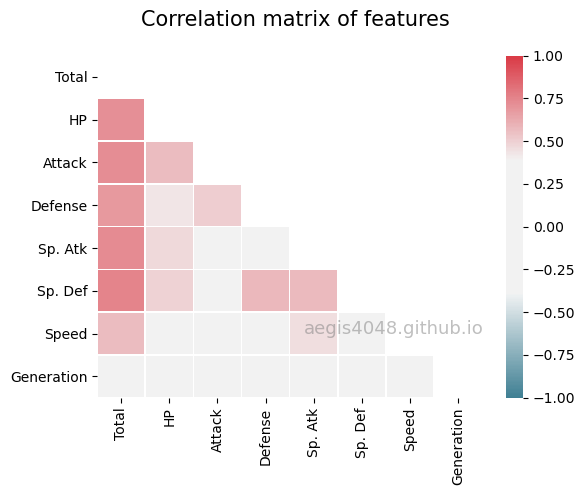

In [75]:
# Correlation Matrix

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')
df = df.iloc[:, 1:-1]

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

In [76]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')
print(df.shape)
df

(800, 13)


#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 13 columns]

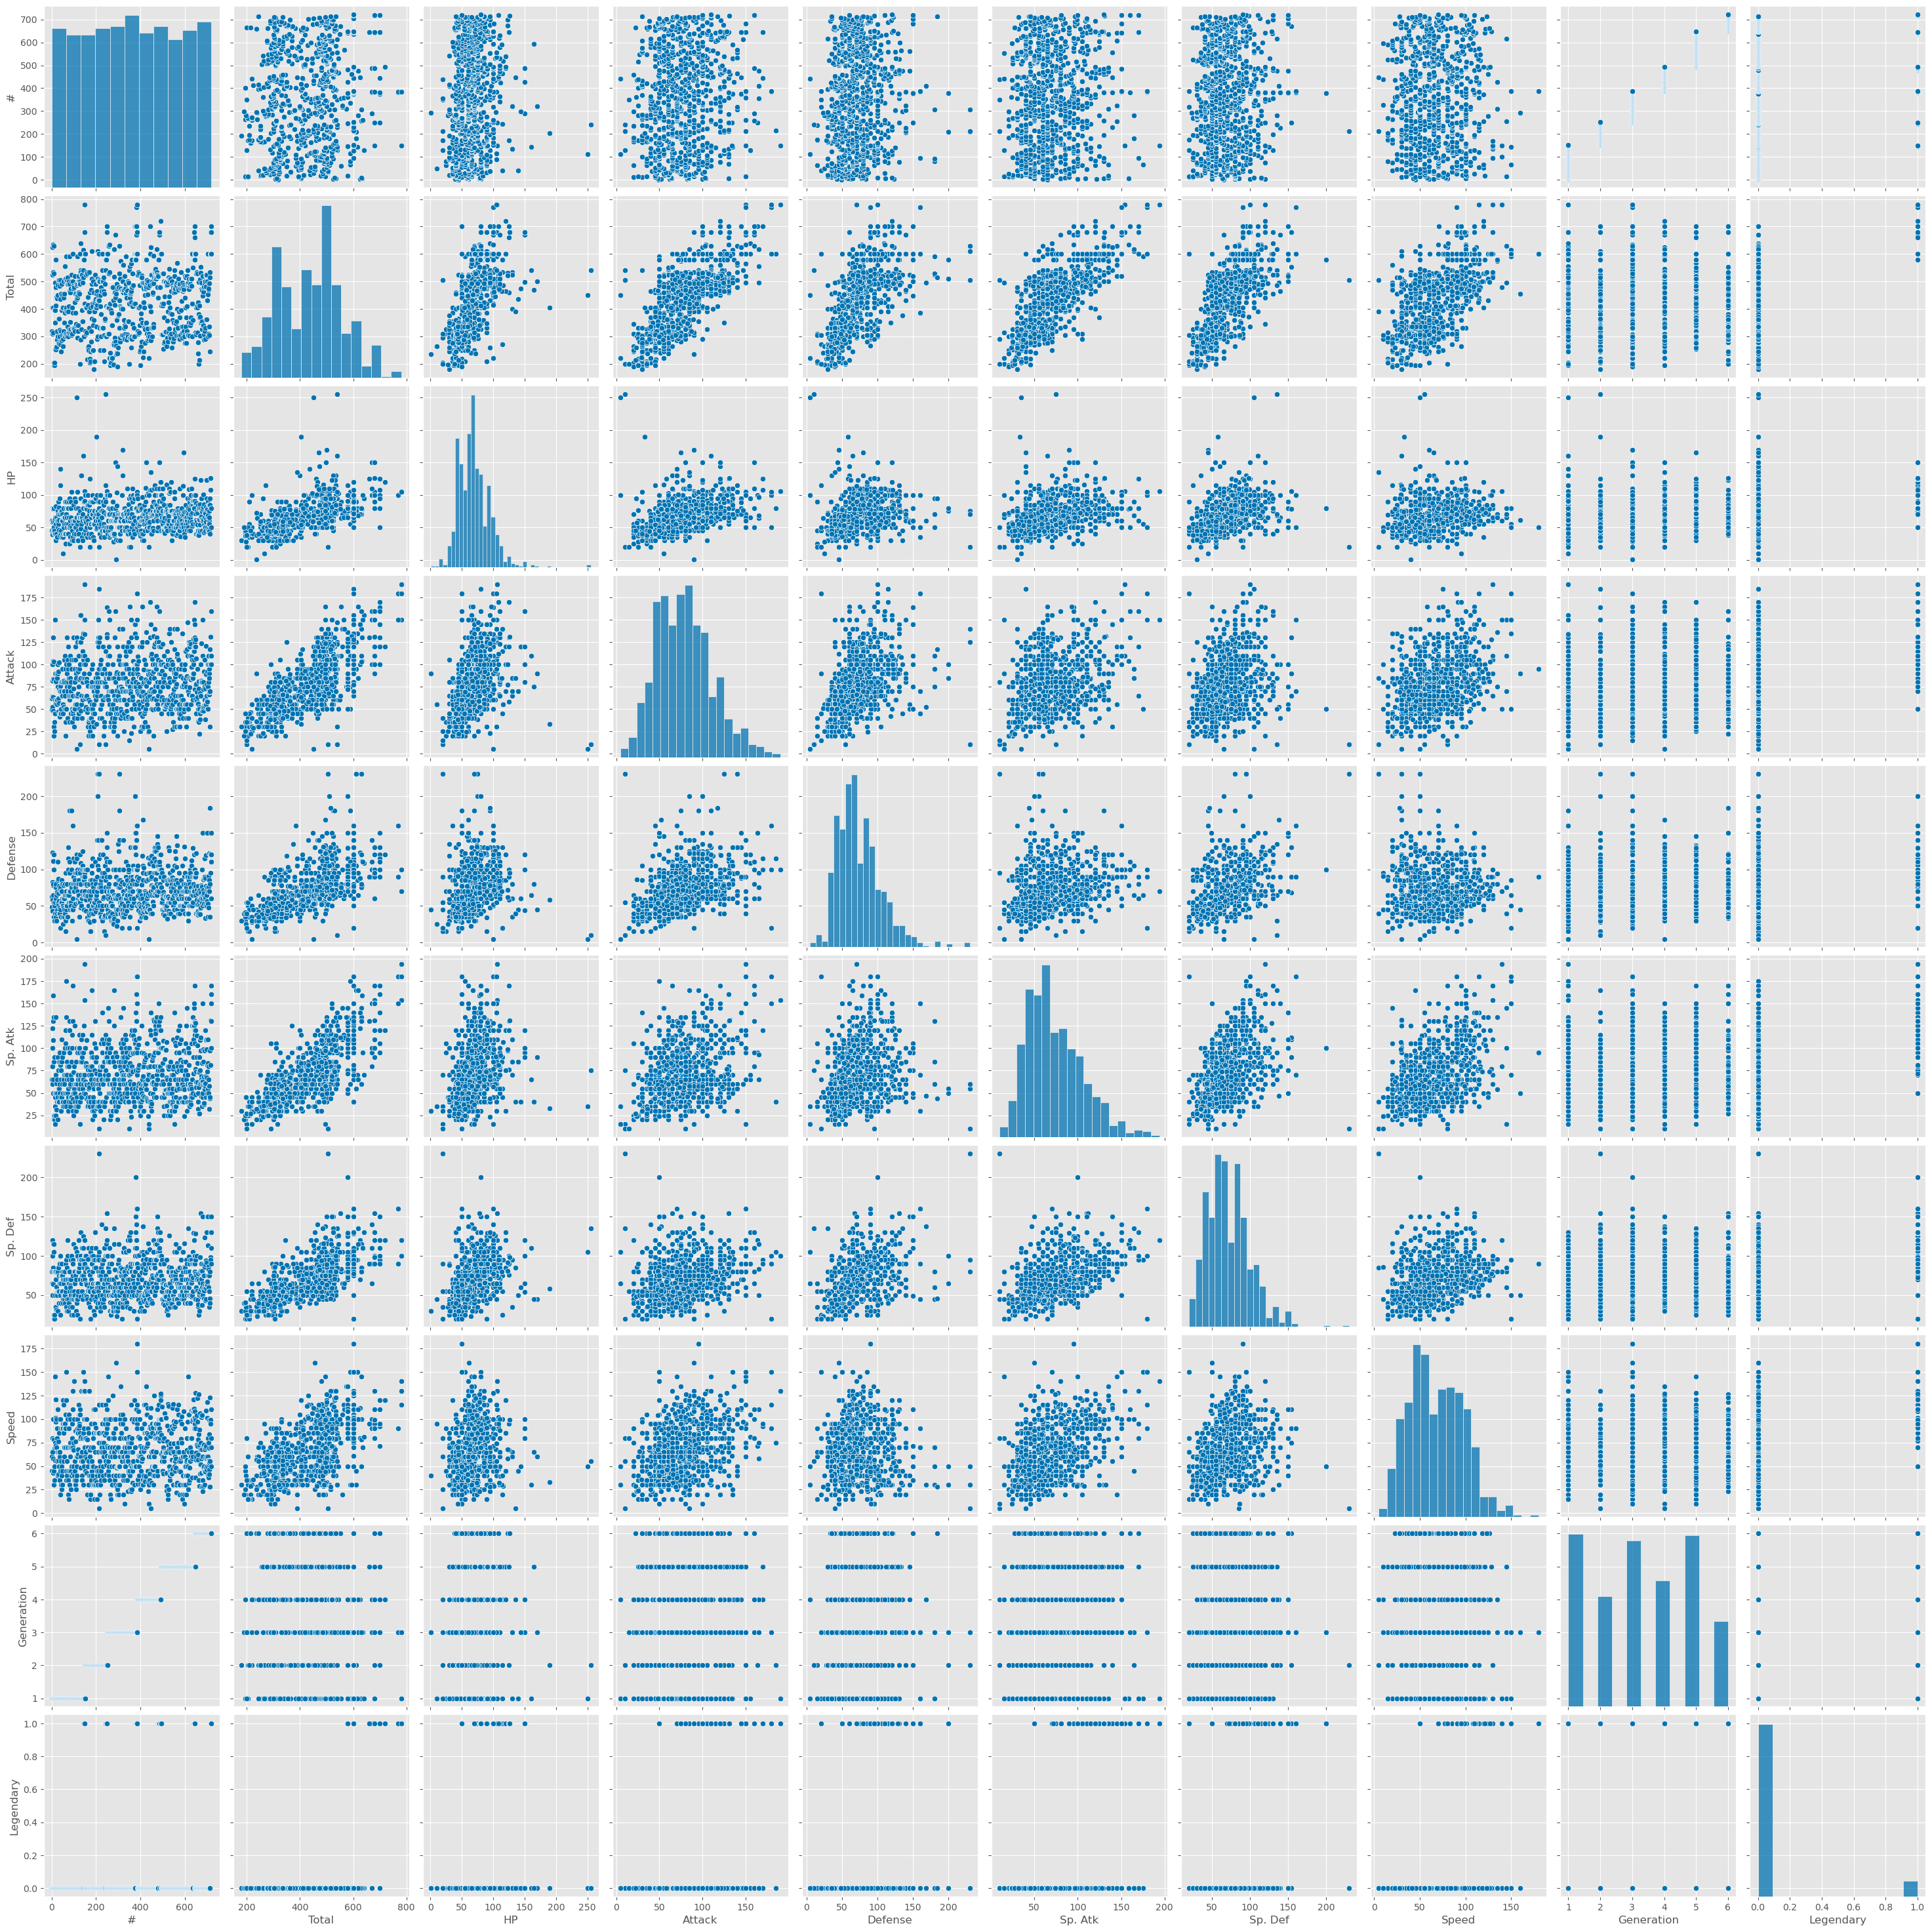

In [77]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df, height=3)

In [78]:
# Plotly Graphs

In [79]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns

In [80]:
pip install plotly==3.10.0

     |████████████████████████████████| 41.5 MB 7.2 MB/s eta 0:00:011
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=15af9292219816364d206fd7ba7fddeaf9407ea0185dcf4f478e1617ed240a6a
  Stored in directory: /Users/matthewduyst/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install chart-studio

     |████████████████████████████████| 64 kB 389 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [82]:
from chart_studio import plotly

In [83]:
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

In [84]:
# Import Pokemon CSV

df = pd.read_csv ('/Users/matthewduyst/Desktop/ENV 728/Data/Pokemon.csv')

print(df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [85]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [86]:
# Many pokemon have 1 type attribute, leaving about half of the Type 2 attribute empty. Fill missing values with 'blank'
df = df.fillna(value={'Type 2':'Blank'})
# Examine data 
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire   Blank    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [87]:
# Create a Distplot to show univariate distribution of HP observations. Plots histogram and fits kernel density estimate (kde) plot ontop.
fig = ff.create_distplot([df.HP],['HP'],bin_size=5)
iplot(fig, filename='HP Distplot')

In [88]:
# Create a Distplot of All Stats
hist_data = [df['HP'],df['Attack'],df['Defense'],df['Sp. Atk'],df['Sp. Def'],df['Speed']]
group_labels = list(df.iloc[:,5:11].columns)

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig, filename='All Pokemon Stats Distplot')

In [89]:
# Create a Distplot of Attack vs Defense
hist_data = [df['Attack'],df['Defense']]
group_labels = ['Attack','Defense']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig, filename='Attack vs Defense Displot')

In [90]:
# Create a Boxplot for All Stats
trace0 = go.Box(y=df["HP"],name="HP")
trace1 = go.Box(y=df["Attack"],name="Attack")
trace2 = go.Box(y=df["Defense"],name="Defense")
trace3 = go.Box(y=df["Sp. Atk"],name="Sp. Atk")
trace4 = go.Box(y=df["Sp. Def"],name="Sp. Def")
trace5 = go.Box(y=df["Speed"],name="Speed")
data = [trace0, trace1, trace2,trace3, trace4, trace5]
iplot(data)

In [91]:
# Create Violin Plot of all Stats - like a Boxplot, but with rotated kernel density plot on each side

data = []
for i in range(5,11):
    trace = {
            "type": 'violin',
            "x": max(df.iloc[:,i]),
            "y": df.iloc[:,i],
            "name": list(df.columns)[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data.append(trace)
        
fig = {
    "data": data,
    "layout" : {
        "title": "Violin Plot (All Pokemon Statistics)",
        "yaxis": {
            "zeroline": False,
        }
    }
}

iplot(fig, filename='violin', validate = False)

In [92]:
# Visualizing Stats of Single Pokemon using Radar Charts - displays multivariate data in two-dimensional chart of three or more quantitative variables represented on axes starting froms same point.

x = df[df["Name"] == "Mewtwo"]
data = [go.Scatterpolar(
  r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
  theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 250]
    )
  ),
  showlegend = False,
  title = "Stats of {}".format(x.Name.values[0])
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Mewtwo Stats")

In [93]:
# Comparing Stats of 2 Pokemon using Radar Charts

# comparing 2 individuals and look into special attack vs. hp (Justify why!)

def compare2pokemon(x,y):
    x = df[df["Name"] == x]
    y = df[df["Name"] == y]

    trace0 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = x.Name.values[0]
    )

    trace1 = go.Scatterpolar(
      r = [y['HP'].values[0],y['Attack'].values[0],y['Defense'].values[0],y['Sp. Atk'].values[0],y['Sp. Def'].values[0],y['Speed'].values[0],y["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = y.Name.values[0]
    )

    data = [trace0, trace1]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 200]
        )
      ),
      showlegend = True,
      title = "{} vs {}".format(x.Name.values[0],y.Name.values[0])
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Two Pokemon stats")
    
# Comparing Mewtwo and Mew
compare2pokemon("Mewtwo", "Mew")

In [94]:
# Create a Scatterplot to show values of two variables plotted along two axes. Pattern represents potential points of correlation present.

trace1 = go.Scatter(
    x = df["Defense"],
    y = df["HP"],
    mode='markers',
    marker=dict(
        size = df["Speed"]/5,
        color = df["Speed"],#set color equal to a variable
        colorscale='Electric',
        showscale=True
    ),
    text=df["Name"]
)
data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="Scatterplot of Defense vs HP and Speed as Datapoint size",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")

In [95]:
# Create a 3D Scatterplot

# this is what's happening with regression of 2 predictors - simple linear regression = 1 predictor, 1 response (this shows that you can be predciting more than y variable)

t = go.Scatter3d(
    x=df["HP"],
    y=df["Attack"],
    z=df["Defense"],
    mode='markers',
    marker=dict(
        size=4,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=1
    )
)
data = [t]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    xaxis=dict(title="HP"),
    yaxis=dict(title="Attack"),
    title = "HP vs Attack vs Defense"
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-scatter')

In [96]:
# Create a Bubble Chart if data has three data series that each contain set of values. Sizes of bubbles are determined by values in the third data series.

sizeref = 2.*max(df['HP'])/(3000)

trace0 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Psychic"][df["Generation"] == 1],
    y=df["Defense"][df["Type 1"] == "Psychic"][df["Generation"] == 1],
    mode='markers',
    name='Generation 1',
    text=df["Name"][df["Type 1"] == "Psychic"][df["Generation"] == 1],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Psychic"][df["Generation"] == 1],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Psychic"][df["Generation"] == 2],
    y=df["Defense"][df["Type 1"] == "Psychic"][df["Generation"] == 2],
    mode='markers',
    name='Generation 2',
    text=df["Name"][df["Type 1"] == "Psychic"][df["Generation"] == 2],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Psychic"][df["Generation"] == 2],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Psychic"][df["Generation"] == 3],
    y=df["Defense"][df["Type 1"] == "Psychic"][df["Generation"] == 3],
    mode='markers',
    name='Generation 3',
    text=df["Name"][df["Type 1"] == "Psychic"][df["Generation"] == 3],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Psychic"][df["Generation"] == 3],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Psychic"][df["Generation"] == 4],
    y=df["Defense"][df["Type 1"] == "Psychic"][df["Generation"] == 4],
    mode='markers',
    name='Generation 4',
    text=df["Name"][df["Type 1"] == "Psychic"][df["Generation"] == 4],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Psychic"][df["Generation"] == 4],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Psychic"][df["Generation"] == 5],
    y=df["Defense"][df["Type 1"] == "Psychic"][df["Generation"] == 5],
    mode='markers',
    name='Generation 5',
    text=df["Name"][df["Type 1"] == "Psychic"][df["Generation"] == 5],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Psychic"][df["Generation"] == 5],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace5 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Psychic"][df["Generation"] == 6],
    y=df["Defense"][df["Type 1"] == "Psychic"][df["Generation"] == 6],
    mode='markers',
    name='Generation 6',
    text=df["Name"][df["Type 1"] == "Psychic"][df["Generation"] == 6],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Psychic"][df["Generation"] == 6],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)

data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Psychic Pokemon Attack vs Defense Stats over the Generations',
    xaxis=dict(
        title='Attack',
        gridcolor='rgb(255, 255, 255)',
        range=[0,200]
    ),
    yaxis=dict(
        title='Defense',
        gridcolor='rgb(255, 255, 255)',
        range=[0,200]
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='bubble.png')

In [97]:
# Create a Bubble Chart if data has three data series that each contain set of values. Sizes of bubbles are determined by values in the third data series.

sizeref = 2.*max(df['HP'])/(3000)

trace0 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Water"][df["Generation"] == 1],
    y=df["Defense"][df["Type 1"] == "Water"][df["Generation"] == 1],
    mode='markers',
    name='Generation 1',
    text=df["Name"][df["Type 1"] == "Water"][df["Generation"] == 1],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Water"][df["Generation"] == 1],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Water"][df["Generation"] == 2],
    y=df["Defense"][df["Type 1"] == "Water"][df["Generation"] == 2],
    mode='markers',
    name='Generation 2',
    text=df["Name"][df["Type 1"] == "Water"][df["Generation"] == 2],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Water"][df["Generation"] == 2],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Water"][df["Generation"] == 3],
    y=df["Defense"][df["Type 1"] == "Water"][df["Generation"] == 3],
    mode='markers',
    name='Generation 3',
    text=df["Name"][df["Type 1"] == "Water"][df["Generation"] == 3],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Water"][df["Generation"] == 3],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Water"][df["Generation"] == 4],
    y=df["Defense"][df["Type 1"] == "Water"][df["Generation"] == 4],
    mode='markers',
    name='Generation 4',
    text=df["Name"][df["Type 1"] == "Water"][df["Generation"] == 4],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Water"][df["Generation"] == 4],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace4 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Water"][df["Generation"] == 5],
    y=df["Defense"][df["Type 1"] == "Water"][df["Generation"] == 5],
    mode='markers',
    name='Generation 5',
    text=df["Name"][df["Type 1"] == "Water"][df["Generation"] == 5],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Water"][df["Generation"] == 5],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)
trace5 = go.Scatter(
    x=df["Attack"][df["Type 1"] == "Water"][df["Generation"] == 6],
    y=df["Defense"][df["Type 1"] == "Water"][df["Generation"] == 6],
    mode='markers',
    name='Generation 6',
    text=df["Name"][df["Type 1"] == "Water"][df["Generation"] == 6],
    marker=dict(
        sizemode='area',
        size=df["HP"][df["Type 1"] == "Water"][df["Generation"] == 6],
        sizeref=sizeref,
        line=dict(
            width=2
        ),
    )
)

data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Water Pokemon Attack vs Defense Stats over the Generations',
    xaxis=dict(
        title='Attack',
        gridcolor='rgb(255, 255, 255)',
        range=[0,200]
    ),
    yaxis=dict(
        title='Defense',
        gridcolor='rgb(255, 255, 255)',
        range=[0,200]
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='bubble.png')

In [98]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [99]:
# Create a Treemap to Display Hierarchical Data as Nested Figures (Rectanges)

import squarify

x = 0.
y = 0.
width = 50.
height = 50.
type_list = list(df["Type 1"].unique())
values = [len(df[df["Type 1"] == i]) for i in type_list]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

In [100]:
# Scatterplot Matrix contains all the pairwise scatter plots in matrix format

# keep response variable (predictor) on top row - predicting HP

# looking across entire top row of scatterplots shows slight megaphone effect (boxplot shows right skew with big outliers)

# possible boxcox transformation of HP (which will lead to log transformation)

# if you do regression as analysis - show 5 steps syshpius regression

fig = ff.create_scatterplotmatrix(df.iloc[:,5:12], index='Generation', diag='box', size=2, height=800, width=800)
iplot(fig, filename ='Scatterplotmatrix.png',image='png')

In [101]:
# Graphs Below show similar data, but using Seaborn instead of Plotly

<AxesSubplot:xlabel='Generation', ylabel='count'>

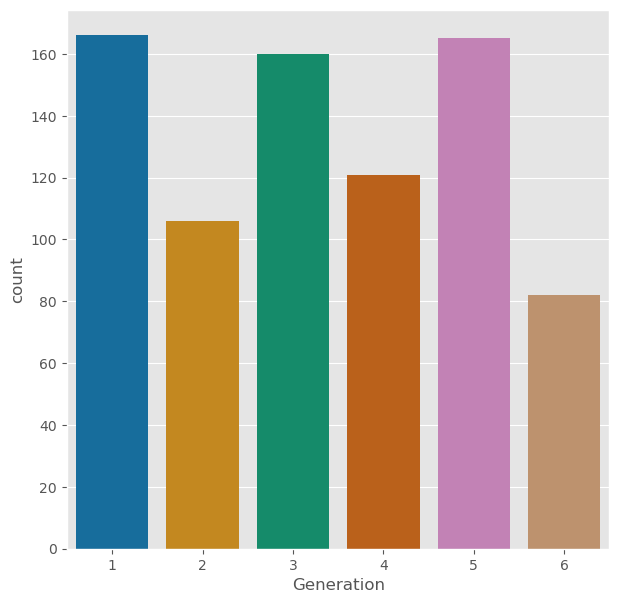

In [103]:
# Histogram of Number of Legendary Pokemon by Generation

# pick a variable and do ANOVA (with HP as predcitor) - how do Mean HP differ across generations?

sns.countplot(df['Generation'])

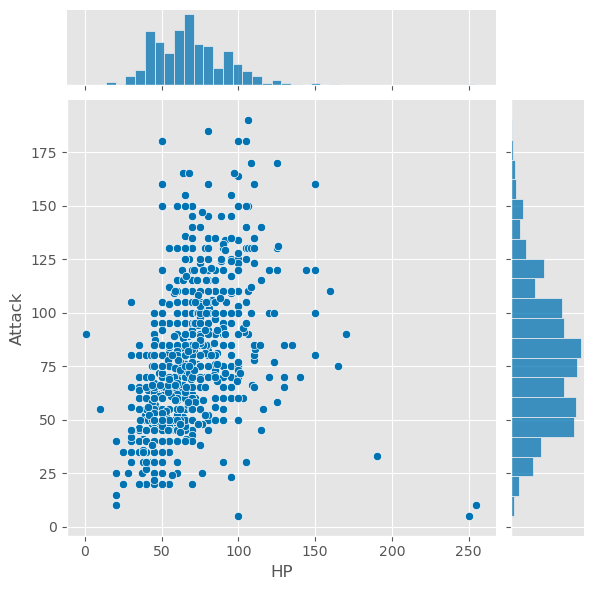

In [104]:
# Scatterplot of Attack and HP Levels

sns.jointplot(x='HP', y='Attack', data=df)

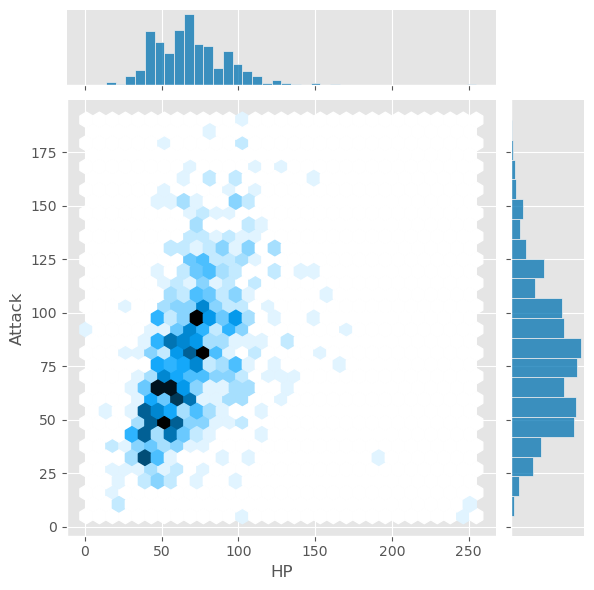

In [105]:
# Hexplot showing Attack and HP Levels

sns.jointplot(x='HP', y='Attack', data=df, kind='hex')

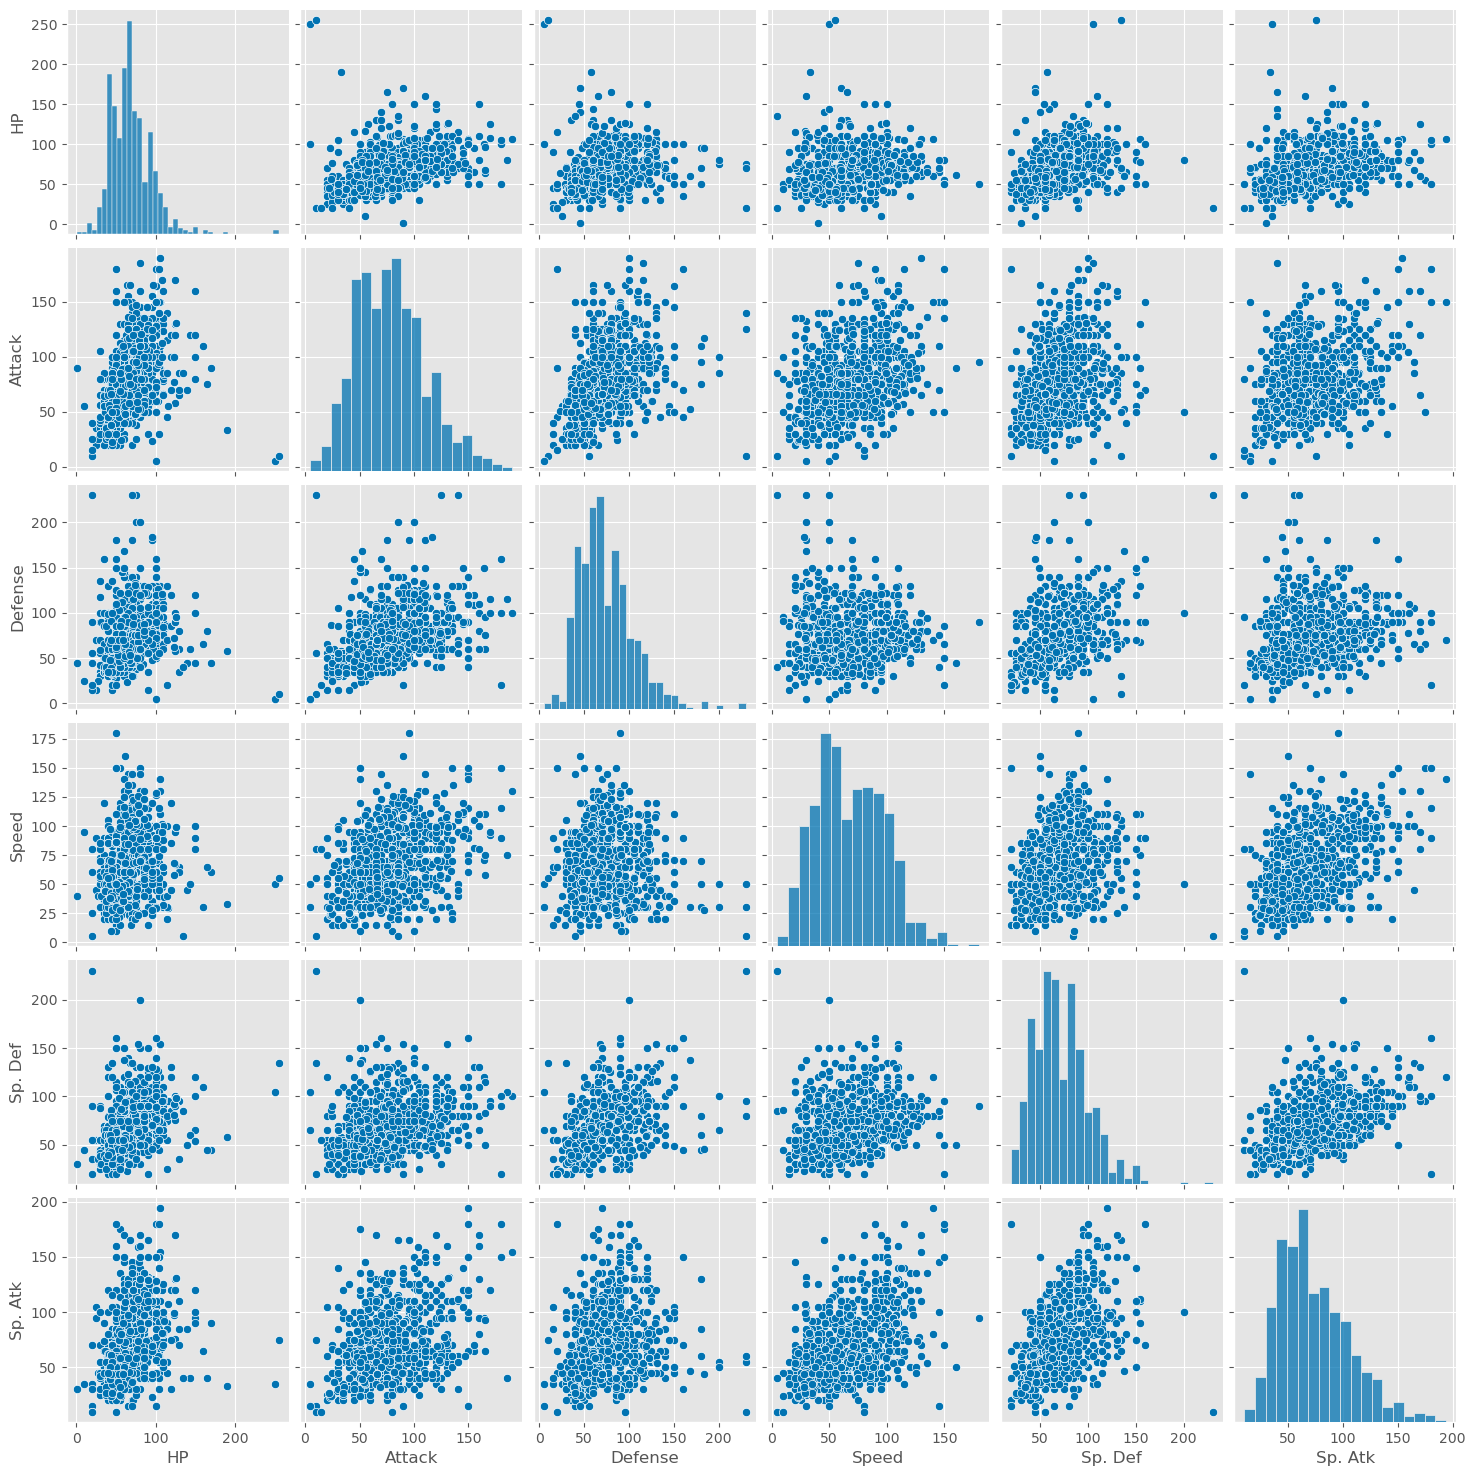

In [106]:
# Matrix plot showing All Values

# shows skewness in HP (if you treat as response variable) - and maybe transform it!

sns.pairplot(df[['HP', 'Attack', 'Defense', 'Speed', 'Sp. Def', 'Sp. Atk']])

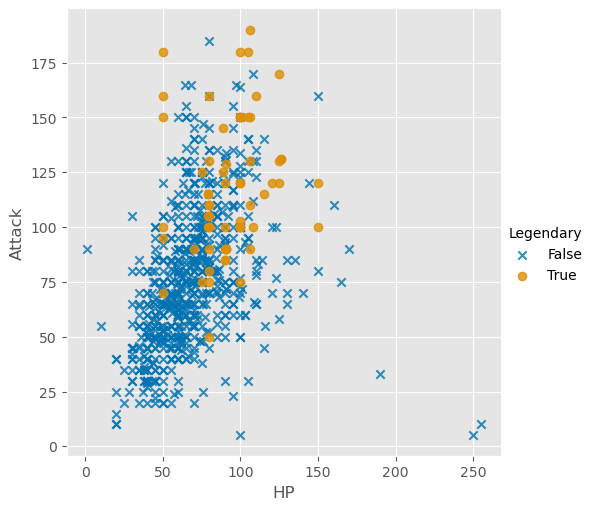

In [107]:
# Identifying Legendary Pokemon Stats (HP & Attack)

sns.lmplot(x='HP', y='Attack', hue='Legendary', 
           markers=['x', 'o'],
           fit_reg=False, data=df)